<a href="https://colab.research.google.com/github/Charan6924/Deep-Learning/blob/main/CostomMLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [ ]:
def f(x):
  return 3*x**2 - 4*x + 5

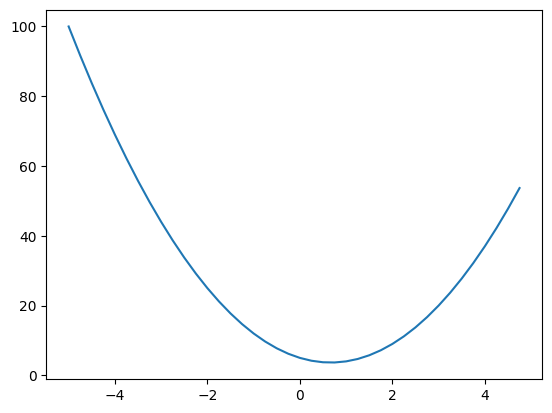

In [ ]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [ ]:
h = 0.001
x = -3.0
(f(x+h)-f(x))/h

-21.996999999998934

In [ ]:
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [ ]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
c += h
d2 = a*b + c
print(f'slope {(d2-d1)/h}')

slope 0.9999999999976694


In [ ]:
class Value:
  def __init__(self,data,_children=(), _op = '',label = ''):
    self.data = data
    self._prev = set(_children)
    self.label = label
    self._op = _op
    self.grad = 0.0
    self._backward = lambda: None

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data + other.data, (self, other),'+')
    def _backward():
      self.grad += 1 * out.grad
      other.grad += 1 * out.grad
    out._backward = _backward
    return out

  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data * other.data, (self, other),'*')
    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward
    return out

  def __rmul__(self, other):
    return self * other

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')

    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward

    return out
  def backward(self):

    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)

    self.grad = 1.0
    for node in reversed(topo):
      node._backward()

  def exp(self):
    x = self.data
    out = Value(math.exp(x), (self, ), 'exp')

    def _backward():
      self.grad += out.data * out.grad
    out._backward = _backward

    return out

  def __truediv__(self, other):
    return self * other**-1

  def __neg__(self):
    return self * -1

  def __sub__(self, other):
    return self + (-other)

  def __radd__(self, other):
    return self + other

  def __pow__(self, other):
    assert isinstance(other, (int, float)), "only supporting int/float powers for now"
    out = Value(self.data**other, (self,), f'**{other}')

    def _backward():
        self.grad += other * (self.data ** (other - 1)) * out.grad
    out._backward = _backward
    return out



In [ ]:
d._prev

{Value(data=-6.0), Value(data=10)}

In [ ]:
d._op

'+'

In [ ]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot


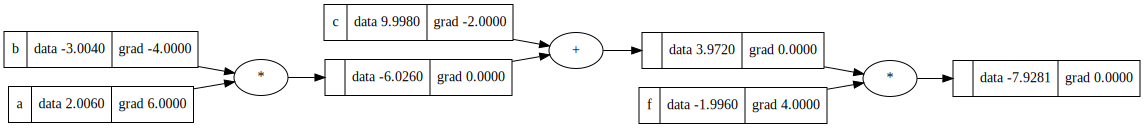

In [ ]:
draw_dot(L)

In [ ]:
a.data += 0.001 * a.grad
b.data += 0.001 * b.grad
c.data += 0.001 * c.grad
f.data += 0.001 * f.grad
e = a*b
d = e + c
L = d * f
print(L.data)

-7.928064095999999


In [ ]:
L.grad = 1
d.grad = -2
f.grad = 4
c.grad = -2
e.grad = -2
a.grad = -2.0 * -3.0
b.grad = -2.0 * 2.0

In [ ]:
def lol():

  h = 0.001

  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L1 = L.data

  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  d.data += h
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L2 = L.data

  print((L2 - L1)/h)

lol()

-2.000000000000668


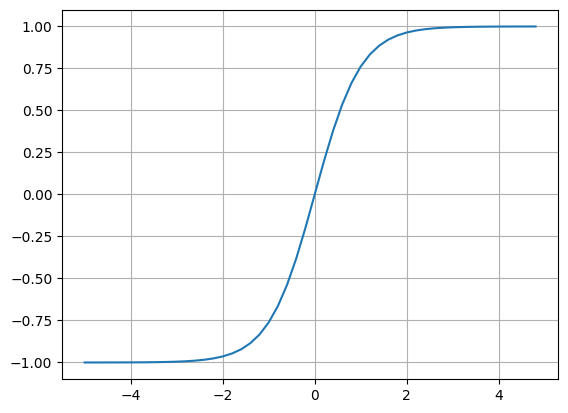

In [ ]:
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid();

In [ ]:
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

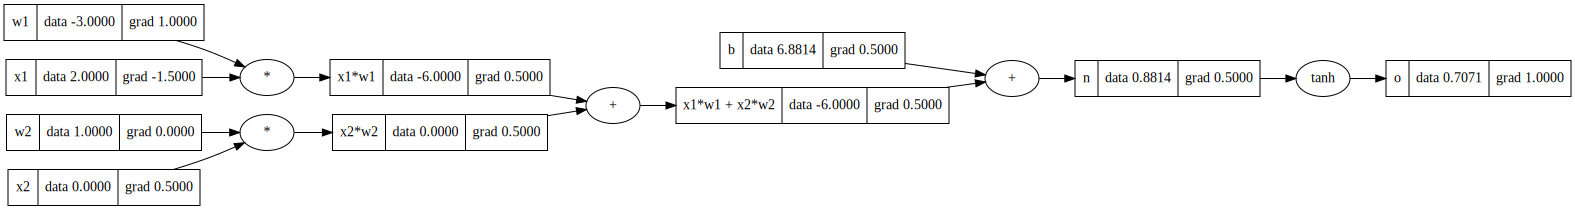

In [ ]:
draw_dot(o)

In [ ]:
o.backward()

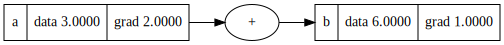

In [ ]:
a = Value(3.0, label='a')
b = a + a   ; b.label = 'b'
b.backward()
draw_dot(b)

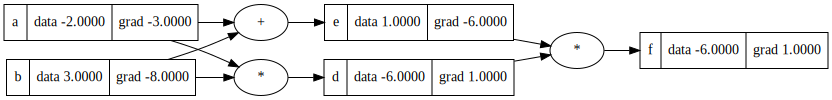

In [ ]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b    ; d.label = 'd'
e = a + b    ; e.label = 'e'
f = d * e    ; f.label = 'f'

f.backward()

draw_dot(f)

In [ ]:
a = Value(2.0)
2*a

Value(data=4.0)

In [ ]:
class Neuron:
  def __init__(self,nin):
    self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
    self.b = Value(random.uniform(-1,1))

  def __call__(self,x):
     out = sum((wi*xi for wi, xi in zip(self.w,x)), self.b)
     out = out.tanh()
     return out

  def parameters(self):
    return self.w + [self.b]

class Layer:

  def __init__(self, nin, nout):
    self.neurons = [Neuron(nin) for _ in range(nout)]

  def __call__(self, x):
    outs = [n(x) for n in self.neurons]
    return outs[0] if len(outs) == 1 else outs

  def parameters(self):
    return [p for neuron in self.neurons for p in neuron.parameters()]

class MLP:

  def __init__(self, nin, nouts):
    sz = [nin] + nouts
    self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

  def __call__(self, x):
    for layer in self.layers:
      x = layer(x)
    return x

  def parameters(self):
    return [p for layer in self.layers for p in layer.parameters()]


In [ ]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)

Value(data=0.3134815247584556)

In [ ]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets
y_pred = [n(x) for x in xs]
y_pred

[Value(data=0.3134815247584556),
 Value(data=0.4899344528213485),
 Value(data=-0.4868840762903204),
 Value(data=0.348136933704876)]

In [ ]:
loss = sum((yout-ygt)**2 for ygt,yout in zip(ys,y_pred))
loss

Value(data=3.3794256989161453)

In [ ]:
loss.backward()

In [ ]:
n.layers[0].neurons[0].w

[Value(data=0.0639044147649821),
 Value(data=0.6299251709187499),
 Value(data=-0.8006862177975744)]

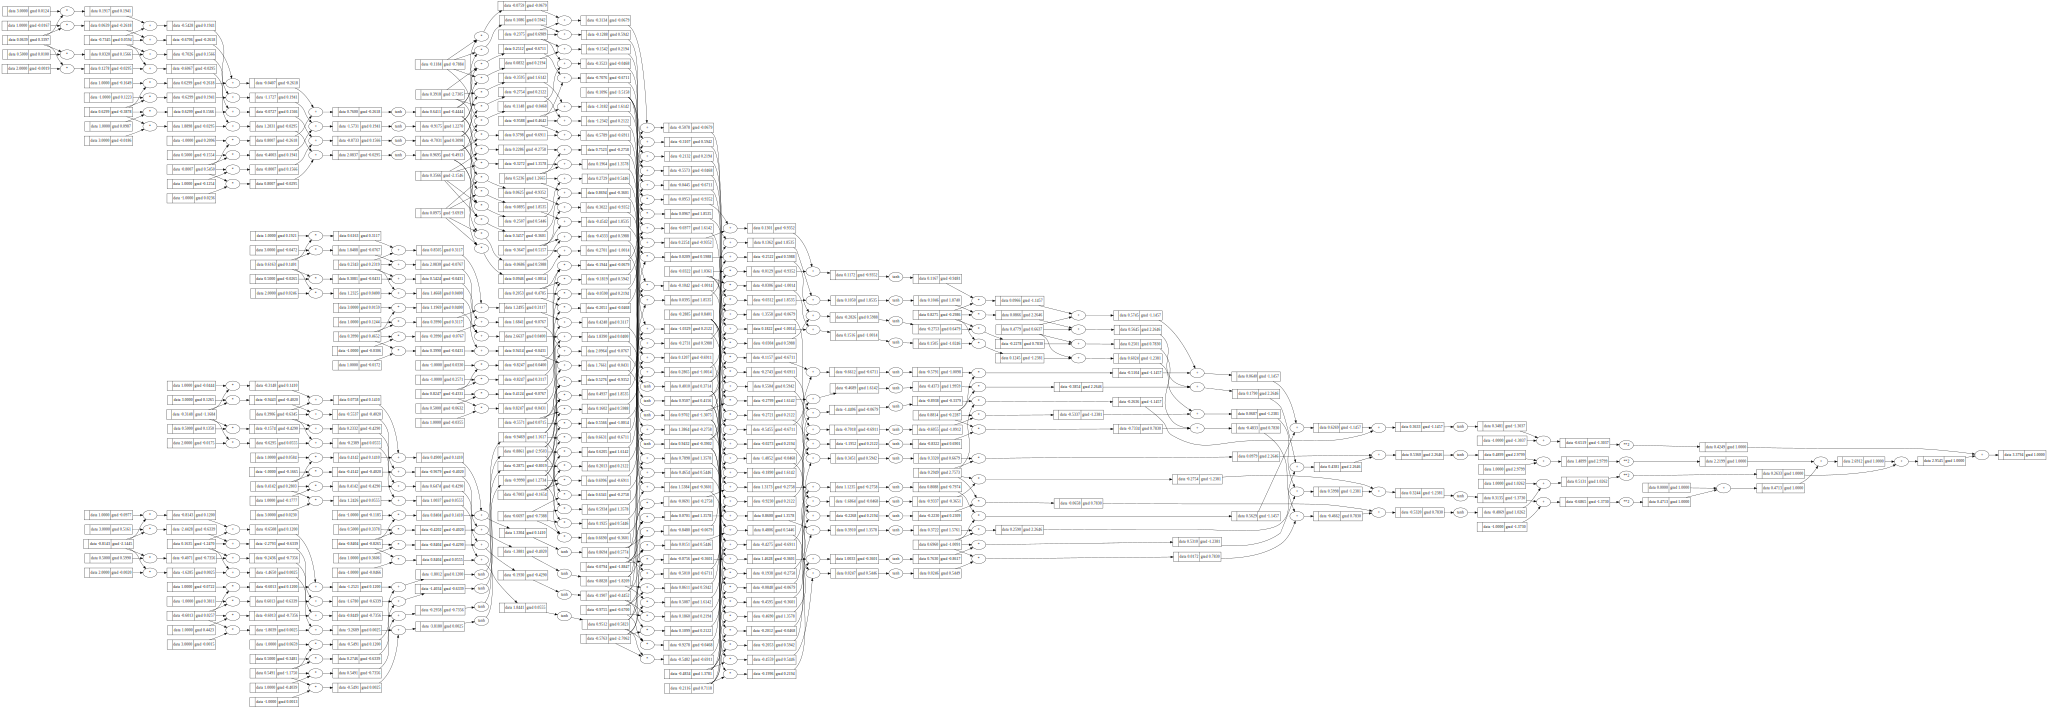

In [ ]:
draw_dot(loss)

In [ ]:
n.parameters()

[Value(data=0.0639044147649821),
 Value(data=0.6299251709187499),
 Value(data=-0.8006862177975744),
 Value(data=-0.7345286400052384),
 Value(data=-0.8142586714055926),
 Value(data=-0.6012975147378012),
 Value(data=0.5491214182010222),
 Value(data=0.16350614271008035),
 Value(data=-0.31475863517021185),
 Value(data=0.4141993975120244),
 Value(data=-0.8404102934287003),
 Value(data=0.39057401048862284),
 Value(data=0.616260585585495),
 Value(data=0.39897993199871773),
 Value(data=0.8247025329078792),
 Value(data=0.2342654566372857),
 Value(data=0.09753087322328846),
 Value(data=-0.5571376679323479),
 Value(data=-0.10959282862436082),
 Value(data=-0.03220382848367476),
 Value(data=-0.36468596771968076),
 Value(data=0.39177323555138654),
 Value(data=-0.7002791266104527),
 Value(data=-0.5762943706016932),
 Value(data=-0.2885300988145454),
 Value(data=-0.9587516876009927),
 Value(data=0.3566242254668208),
 Value(data=-0.6696803599704091),
 Value(data=-0.07944847140926892),
 Value(data=-0.483

In [ ]:
n = MLP(3, [4, 4, 1])

In [ ]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets

In [ ]:
for k in range(20):
  ypred = [n(x) for x in xs]
  loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))

  for p in n.parameters():
    p.grad = 0.0
  loss.backward()

  for p in n.parameters():
    p.data += -0.1 * p.grad

  print(k, loss.data)


0 0.009920398570689682
1 0.009535428400086298
2 0.00918129168950824
3 0.008854183688495401
4 0.008550926337009643
5 0.008268841646105992
6 0.008005654880230952
7 0.0077594196331812
8 0.0075284592044266175
9 0.007311320261295648
10 0.007106735866636521
11 0.006913595720947186
12 0.0067309220163340976
13 0.006557849695408294
14 0.006393610197164054
15 0.006237517985127717
16 0.00608895931204053
17 0.0059473827949829755
18 0.0058122914656950405
19 0.005683236030404353
